In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_folder_path = "~/Documents/THESIS/Project_Juan/"

In [2]:
tests = ['PNPfast', 'PNPpref']
pace_perc = [0.1, 0.0]
pacing_data = pd.DataFrame(data = None,
                           columns=['step_frequency', 'runner_id', 'preferred_pace', 'pacing', 'time', 'preferred_percentage'],
                           dtype='float64')
for participant in range(1, 16, 1):
    participant_number = str(participant)

    for i in range(len(tests)):
        # plt.subplot(len(tests)*100+11+i)
        calculated_values = pd.read_csv(data_folder_path + ('calculated_variables/%s_R_%s_calculated.csv')%(tests[i], participant_number))

        pace_norm = calculated_values[calculated_values['pacing_frequency'].notna()]['pacing_frequency'].mean()
        calculated_values_norm = calculated_values.copy()
        calculated_values_norm['step_frequency'] = calculated_values_norm['step_frequency']/pace_norm

        calculated_paced = calculated_values_norm[calculated_values['pacing_frequency'].notna()]
        calculated_not_paced = calculated_values_norm[calculated_values['pacing_frequency'].isna()]

        m_a = calculated_values_norm['step_frequency'].ewm(alpha=0.05).mean()
        m_a_df = m_a.to_frame()
        m_a_df['runner_id']= participant
        m_a_df['preferred_pace'] = pace_norm
        m_a_df['pacing'] = np.where(calculated_values_norm['pacing_frequency'].notna(), 1, 0)
        m_a_df['time'] = calculated_values_norm['interval_footstrikes'].cumsum()
        m_a_df['preferred_percentage'] = pace_perc[i]
        pacing_data = pd.concat([pacing_data, m_a_df])

In [3]:
pacing_data.describe()

,step_frequency,runner_id,preferred_pace,pacing,time,preferred_percentage
count,12749.000000,12749.000000,12749.000000,12749.000000,12749.000000,12749.000000
mean,0.997590,8.063927,172.176825,0.401992,74.787629,0.051910
std,0.031885,4.303322,12.871262,0.490320,43.142367,0.049965
min,0.866347,1.000000,148.884500,0.000000,0.332000,0.000000
25%,0.989730,4.000000,165.287739,0.000000,37.410000,0.000000
50%,1.000647,8.000000,170.460500,0.000000,74.766000,0.100000
75%,1.007967,12.000000,183.484934,1.000000,112.128000,0.100000
max,1.338300,15.000000,194.805000,1.000000,149.796000,0.100000


In [4]:
pacing_data.head()

,step_frequency,runner_id,preferred_pace,pacing,time,preferred_percentage
0,0.991748,1.0,166.2065,1.0,0.364,0.1
1,0.970335,1.0,166.2065,1.0,0.744,0.1
2,0.975942,1.0,166.2065,1.0,1.110,0.1
3,0.971670,1.0,166.2065,1.0,1.486,0.1
4,0.990209,1.0,166.2065,1.0,1.828,0.1


In [5]:
runner_id = 15

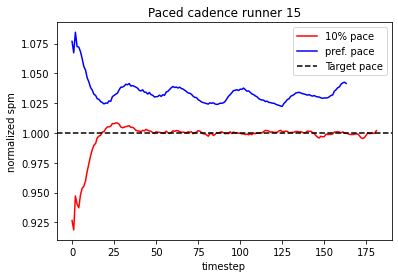

In [6]:
pacing_data[(pacing_data['runner_id']==runner_id) & (pacing_data['pacing']==1) & (pacing_data['preferred_percentage']==0.1)]['step_frequency'].plot(color='r', label='10% pace')
pacing_data[(pacing_data['runner_id']==runner_id) & (pacing_data['pacing']==1) & (pacing_data['preferred_percentage']==0)]['step_frequency'].plot(color='b', label='pref. pace')
plt.axhline(y=1, color='k', linestyle='--', label='Target pace')
plt.ylabel(r'normalized spm')
plt.xlabel(r'timestep')
plt.title("Paced cadence runner " + str(runner_id))
plt.legend()
plt.show()

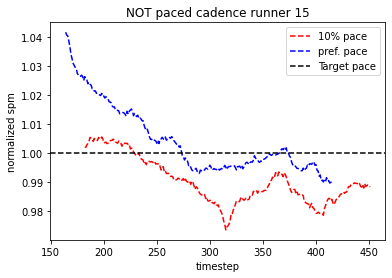

In [7]:
pacing_data[(pacing_data['runner_id']==runner_id) & (pacing_data['pacing']==0) & (pacing_data['preferred_percentage']==0.1)]['step_frequency'].plot(color='r', linestyle='--',label='10% pace')
pacing_data[(pacing_data['runner_id']==runner_id) & (pacing_data['pacing']==0) & (pacing_data['preferred_percentage']==0)]['step_frequency'].plot(color='b', linestyle='--',label='pref. pace')
plt.axhline(y=1, color='k', linestyle='--', label='Target pace')

plt.ylabel(r'normalized spm')
plt.xlabel(r'timestep')
plt.title("NOT paced cadence runner " + str(runner_id))
plt.legend()
plt.show()

In [8]:

def stack_uneven(matrix, array):

    # The resultant array has stacked on the first dimension
    result = []
    max_length = max(matrix.shape[1], len(array))
    for row in matrix:
        temp = np.append(row, np.ones(max_length - len(row)))
        # result = np.append(result, [[temp]], axis=0)
        if len(result) == 0:
            result = temp
        else:
            result = np.vstack((result, temp))
    temp = np.append(array, np.ones(max_length - len(array)))
    # result = np.append(result, [[temp]], axis=0)
    result = np.vstack((result, temp))

    return result

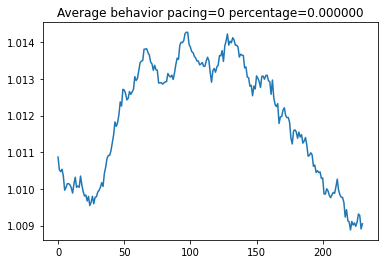

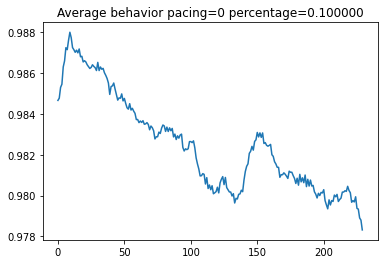

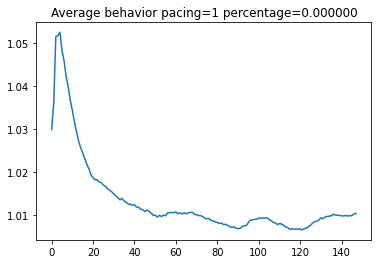

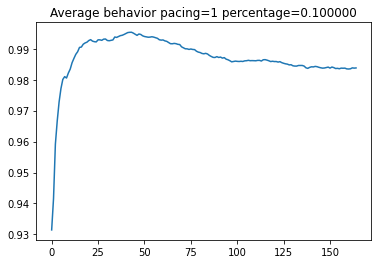

In [9]:
# 0.3377
legends = []
for pacing in [0, 1]:
    for percentage in [0.0, 0.1]:
        plt.figure()
        test_pacing_data = pacing_data.copy()
        accumulated_pace = []
        minimum_size = np.inf
        for participant in range(1, 16, 1):
            current_array = test_pacing_data[(test_pacing_data['runner_id']==participant) &
                  (test_pacing_data['pacing']==pacing) &
                  (test_pacing_data['preferred_percentage']==percentage)]['step_frequency']
            if len(current_array) < minimum_size:
                minimum_size = len(current_array)
            if len(accumulated_pace) == 0:
                accumulated_pace = np.expand_dims(current_array.to_numpy(), axis=0)
            else:
                accumulated_pace = stack_uneven(accumulated_pace, current_array.to_numpy())
        accumulated_pace = accumulated_pace[:, :minimum_size].mean(axis=0)
        plt.title('Average behavior pacing=%d percentage=%f' %(pacing, percentage))
        # legends.append("pacing=%d percentage=%f" %(pacing, percentage))
        plt.plot(accumulated_pace)

# plt.legend(legends)


In [10]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(accumulated_pace, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  165
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 855.101
Date:                Wed, 23 Mar 2022   AIC                          -1698.203
Time:                        09:43:13   BIC                          -1679.604
Sample:                             0   HQIC                         -1690.652
                                - 165                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3569      0.096      3.706      0.000       0.168       0.546
ar.L2          0.1472      0.127      1.155      0.248      -0.103       0.397
ar.L3         -0.0725      0.260     -0.279      0.7

/home/juanes/Documents/THESIS/OPPOSD_algorithm/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/juanes/Documents/THESIS/OPPOSD_algorithm/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juanes/Documents/THESIS/OPPOSD_algorithm/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juanes/Documents/THESIS/OPPOSD_algorithm/venv/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

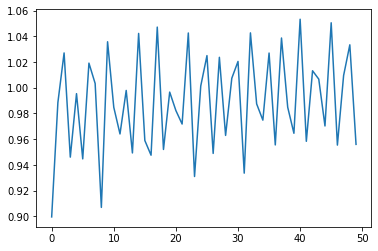

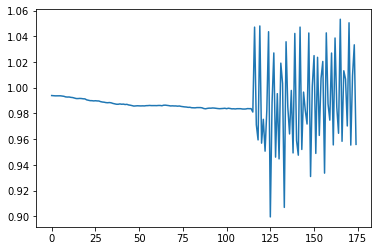

In [11]:
predictions = list()
model_history = accumulated_pace
a = np.random.uniform(0.95, 1.05, 10)
model_history= np.append(model_history, a)
# walk-forward validation
for t in range(50):
    model = ARIMA(model_history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_history = np.roll(model_history,-1)
    model_history[-1] = yhat
    predictions.append(yhat)
	# history = np.append(history, yhat)
# plot forecasts against actual outcomes
plt.plot(predictions)
plt.figure()
plt.plot(model_history)

In [12]:
class MathModel:
    def __init__(self, logaritmic, z, grad=0):
        self.z = z
        self.logaritmic = logaritmic
        self.rand_comp = 0
        if self.logaritmic:
            self.rand_comp = np.random.uniform(0.5, 1.5)
        else:
            self.rand_comp = np.random.uniform(0, 5)
        if grad:
            self.grad = 1 if np.random.random() < 0.5 else -1
        else:
            self.grad = 1


    def calculate_x(self, x):
        if self.logaritmic:
            return self.z[0] * np.log(self.rand_comp * x) + self.z[1]
        else:
            return (self.grad * (self.z[0]+(self.rand_comp*1e-5)))*x + self.z[1]

    def inverse_value(self, y):
        if self.logaritmic:
            return np.exp((y-self.z[1])/self.z[0])/self.rand_comp
        else:
            return 0

    def adjust_intercept(self, new_val):
        self.z[1] = new_val


1.04965412
1.006065493502033
1.006065493502033


Text(0.5, 1.0, 'Functions continuous')

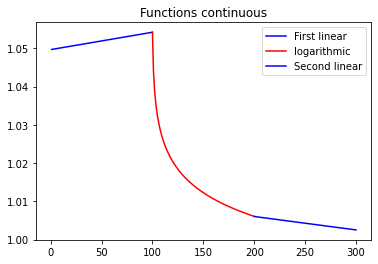

In [75]:
model = MathModel(0, [1.85e-5, 1.04965412])#[-0.00899492,  1.04965412]
x = np.linspace(1, 100, 100)
plt.plot(x, model.calculate_x(x), "b-", label='First linear')

x2 = np.linspace(100, 200, 100)
model2 = MathModel(1, [-0.00899492,  1.04965412])
temp = np.linspace(model2.inverse_value(model.calculate_x(x)[-1]),100, 100)
plt.plot(x2, model2.calculate_x(temp), "r-", label='logarithmic')

x3 = np.linspace(200, 300, 100)
model3 = MathModel(0, [-4e-5,  1.04965412])
print(model3.z[1])
model3.adjust_intercept(model2.calculate_x(temp)[-1])

print(model2.calculate_x(temp)[-1])
print(model3.z[1])

plt.plot(x3, model3.calculate_x(x), "b-", label='Second linear')
plt.legend()
plt.title('Functions continuous')

In [14]:
class Simulator:
    def __init__(self):
        self.pacing_data = self.get_data()
        self.time_step = 0
        self.last_value = None
        self.current_model = 0
        self.models = [None] * 4
        self.models[0] = self.calculate_model(0, 0)
        self.models[1] = self.calculate_model(0, 0.1)
        self.models[2] = self.calculate_model(1, 0)
        self.models[3] = self.calculate_model(1, 0.1)

    def calculate_model(self, pacing, percentage):

        data = self.get_average_data(pacing, percentage)

        if (pacing & (percentage > 0)): # 1-1
            N = len(data)
            x = np.linspace(1, N+1, N)
            z = np.polyfit(np.log(x), data, 1)
            model = MathModel(1, z)

        elif (pacing & (percentage == 0.0)): # 1-0
            N = len(data)
            x = np.linspace(1, N+1, N)
            z = np.polyfit(np.log(x), data, 1)
            model = MathModel(1, z)

        elif (not(pacing) & (percentage>0)): # 0-1
            N = len(data)
            x = np.linspace(0, N, N)
            z = np.polyfit(x, data, 1)
            model = MathModel(1, z)

        else: # 0-0
            N = len(data)
            x = np.linspace(0, N, N)
            z = np.polyfit(x, data, 1)
            model = MathModel(1, z, 0)

        return model

    def get_average_data (self, pacing, percentage):
        test_pacing_data = self.pacing_data.copy()
        accumulated_pace = []
        minimum_size = np.inf
        for participant in range(1, 16, 1):
            current_array = test_pacing_data[(test_pacing_data['runner_id']==participant) &
                  (test_pacing_data['pacing']==pacing) &
                  (test_pacing_data['preferred_percentage']==percentage)]['step_frequency']
            if len(current_array) < minimum_size:
                minimum_size = len(current_array)
            if len(accumulated_pace) == 0:
                accumulated_pace = np.expand_dims(current_array.to_numpy(), axis=0)
            else:
                accumulated_pace = stack_uneven(accumulated_pace, current_array.to_numpy())
        return accumulated_pace[:, :minimum_size].mean(axis=0)

    def get_data(self):
        tests = ['PNPfast', 'PNPpref']
        pace_perc = [0.1, 0.0]
        pacing_data = pd.DataFrame(data = None,
                                   columns=['step_frequency', 'runner_id', 'preferred_pace', 'pacing', 'time', 'preferred_percentage'],
                                   dtype='float64')
        for participant in range(1, 16, 1):
            participant_number = str(participant)

            for i in range(len(tests)):
                # plt.subplot(len(tests)*100+11+i)
                calculated_values = pd.read_csv(data_folder_path + ('calculated_variables/%s_R_%s_calculated.csv')%(tests[i], participant_number))

                pace_norm = calculated_values[calculated_values['pacing_frequency'].notna()]['pacing_frequency'].mean()
                calculated_values_norm = calculated_values.copy()
                calculated_values_norm['step_frequency'] = calculated_values_norm['step_frequency']/pace_norm

                m_a = calculated_values_norm['step_frequency'].ewm(alpha=0.05).mean()
                m_a_df = m_a.to_frame()
                m_a_df['runner_id']= participant
                m_a_df['preferred_pace'] = pace_norm
                m_a_df['pacing'] = np.where(calculated_values_norm['pacing_frequency'].notna(), 1, 0)
                m_a_df['time'] = calculated_values_norm['interval_footstrikes'].cumsum()
                m_a_df['preferred_percentage'] = pace_perc[i]
                pacing_data = pd.concat([pacing_data, m_a_df])
        return pacing_data

    def predict(self, pacing, percentage):

        input_model = int(str(pacing) + str(1 if percentage > 0 else 0), 2)
        if self.time_step == 0:
            self.last_value = np.random.uniform(0.95, 1.05)
            self.time_step = self.time_step + 1
            return self.last_value

        if (input_model != self.current_model):
            if input_model == 1: # 0-1
                self.current_model = 1
                self.models[self.current_model] = self.calculate_model(0, 1.0)
                self.models[self.current_model].adjust_intercept(self.last_value)
                self.time_step = 1

            elif input_model == 2: # 1-0
                self.current_model = 2
                self.models[self.current_model] = self.calculate_model(1, 0)
                self.time_step = self.models[self.current_model].inverse_value(self.last_value)

            elif input_model== 3: # 1-1
                self.current_model = 3
                self.models[self.current_model] = self.calculate_model(1, 0.1)
                self.time_step = self.models[self.current_model].inverse_value(self.last_value)

            else: # 0-0
                self.current_model = 0
                self.models[self.current_model] = self.calculate_model(0, 0)
                self.models[self.current_model].adjust_intercept(self.last_value)
                self.time_step = 1

        self.time_step = self.time_step + 1
        self.last_value = self.models[self.current_model].calculate_x(self.time_step)

        return self.last_value

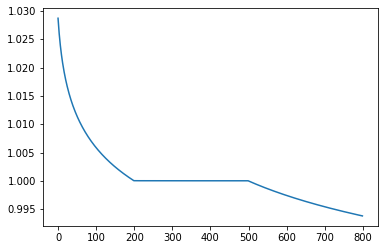

In [15]:
simulator_ = Simulator()
pace = []
for i in range(200):
    pace.append(simulator_.predict(1, 0))
for i in range(300):
    pace.append(simulator_.predict(0, 0))
for i in range(300):
    pace.append(simulator_.predict(1, 0))

plt.plot(pace)

In [16]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

Amplitude=0.0025740532069243424, Angular freq.=0.02170854349420312, phase=-0.8315574734014107, offset=1.0113100819036718, Max. Cov.=0.013715632465722752


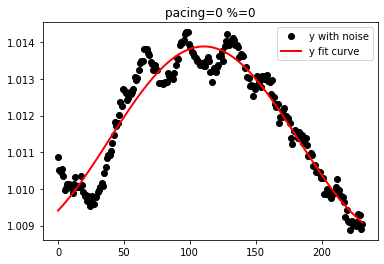

In [35]:
import pylab as plt

N, amp, omega, phase, offset, noise = len(simulator_.get_average_data(0, 0)), 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
tt = np.linspace(0, N, N)
yynoise = simulator_.get_average_data(0, 0)

res = fit_sin(tt, yynoise)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.plot(tt, yynoise, "ok", label="y")
plt.plot(tt, res["fitfunc"](tt), "r-", label="y fit curve", linewidth=2)
# plt.plot(tt, -z[0]*tt + res["fitfunc"](0), "b-", linewidth=3)
plt.title('pacing=0 %=0')
plt.legend(loc="best")
plt.show()

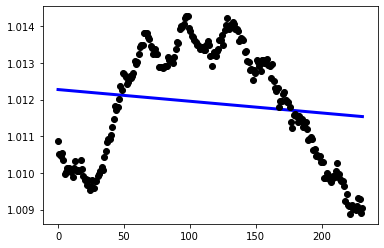

In [69]:
N = len(simulator_.get_average_data(0, 0))
y = simulator_.get_average_data(0, 0)
x = np.linspace(0, N, N)

z = np.polyfit(x, y, 1)
# z = [-1.17034405e-05,  9.86148032e-01]
# rand_comp = np.random.uniform(0, 5)
# grad = 1 if np.random.random() < 0.5 else -1
rand_comp = 0
grad = 1

plt.plot(x, (grad * (z[0]+(rand_comp*1e-5)))*x + z[1], "b-", linewidth=3)
# (x-z[1])/z[0]
plt.plot(x, y, "ok", label="y")
# plt.plot(x, res["fitfunc"](tt), "r-", label="y fit curve", linewidth=2)
# plt.legend(loc="best")
# plt.show()

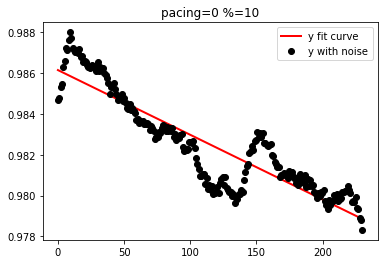

In [60]:
N = len(simulator_.get_average_data(0, 0.1))
y = simulator_.get_average_data(0, 0.1)
x = np.linspace(0, N, N)

z = np.polyfit(x, y, 1)
# z = [-1.17034405e-05,  9.86148032e-01]
# rand_comp = np.random.uniform(0, 5)
# grad = 1 if np.random.random() < 0.5 else -1
rand_comp = 0
grad = 1

plt.plot(x, (grad * (z[0]+(rand_comp*1e-5)))*x + z[1], "r-", label="y fit curve", linewidth=2)
# (x-z[1])/z[0]
plt.plot(x, y, "ok", label="y")
plt.title('pacing=0 %=10')
plt.legend(loc="best")
plt.show()

In [ ]:
N = len(simulator_.get_average_data(0, 0))


[0.00261429 0.97637389]


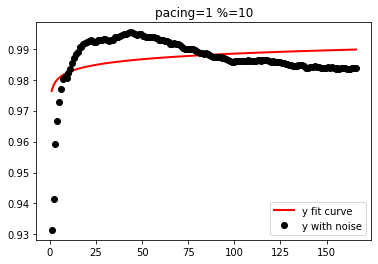

In [50]:
N = len(simulator_.get_average_data(1, 0.1))
y = simulator_.get_average_data(1, 0.1)
x = np.linspace(1, N+1, N)

z = np.polyfit(np.log(x), y, 1)

print(z)

plt.plot(x, z[0] * np.log(x) + z[1], "r-", label="y fit curve", linewidth=2)
plt.plot(x, y, "ok", label="y")
plt.legend(loc="best")
plt.title('pacing=1 %=10')
plt.show()

[-0.00899492  1.04965412]


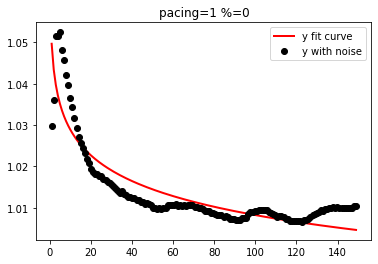

In [41]:
N = len(simulator_.get_average_data(1, 0))
y = simulator_.get_average_data(1, 0)
x = np.linspace(1, N+1, N)

z = np.polyfit(np.log(x), y, 1)

print(z)

plt.plot(x, z[0] * np.log(x) + z[1], "r-", label="y fit curve", linewidth=2)
plt.plot(x, y, "ok", label="y")
plt.legend(loc="best")
plt.title('pacing=1 %=0')
plt.show()

[0.00261429 0.97637389]


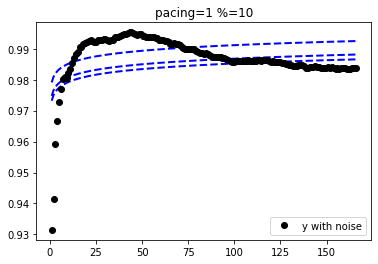

In [59]:
x = np.linspace(1, N+1, N)
print(z)
for i in range (3):
    rand_comp = np.random.uniform(0, 3)
    plt.plot(x, z[0] * np.log(rand_comp * x) + z[1], "b--", linewidth=2)
plt.plot(x, y, "ok", label="y")
plt.legend(loc="best")
plt.title('pacing=1 %=10')
plt.show()

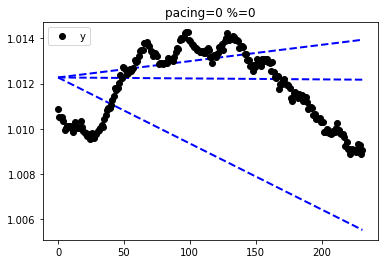

In [72]:
z = np.polyfit(x, y, 1)
# z = [-1.17034405e-05,  9.86148032e-01]
rand_comp = np.random.uniform(0, 5)
# grad = 1 if np.random.random() < 0.5 else -1
grad = 1
for i in range (3):
    rand_comp = np.random.uniform(-3, 3)
    plt.plot(x, (grad * (z[0]+(rand_comp*1e-5)))*x + z[1], "b--", linewidth=2)
# (x-z[1])/z[0]
plt.plot(x, y, "ok", label="y")
plt.legend(loc="best")
plt.title('pacing=0 %=0')
plt.show()

In [80]:
simulator_ = Simulator()
pace = []
pacing = []
for i in range(100):
    pace.append(np.random.uniform(-3, 3))
    pacing.append(0)
for i in range(100):
    pace.append(np.random.uniform(-3, 3))
    pacing.append(1)
for i in range(100):
    pace.append(np.random.uniform(-3, 3))
    pacing.append(0)

x = np.linspace(0, len(pace), len(pace))

In [84]:
simulator_ = Simulator()
pace = []
pacing = []
for i in range(250):
    value = 0
    pace.append(simulator_.predict(value, 181, 181))
    pacing.append(value)
for i in range(400):
    value = 1
    pace.append(simulator_.predict(value, 181, 181))
    pacing.append(value)
for i in range(150):
    value = 0
    pace.append(simulator_.predict(value, 181, 181))
    pacing.append(value)


plt.figure()
x = np.linspace(0, len(pace), len(pace))

plt.scatter(x[np.array(pacing)==1], np.array(pace)[np.array(pacing)==1], marker="x", label='Paced steps')
plt.scatter(x[np.array(pacing)==0], np.array(pace)[np.array(pacing)==0], marker="x", label='Not-paced steps')

plt.axhline(y=181, color='k', linestyle='--', label='Target Pace')

m_a = pd.DataFrame(pace, columns = ['Pace']).ewm(alpha=0.05).mean()
plt.plot(m_a, color="k", label='Avg pace')

plt.legend()
plt.show()

array([-2.73995533, -1.32343287,  2.83639289,  2.34080509, -1.09921549,
        0.49881107,  2.84231144,  2.93761211, -1.09747696,  0.81161198,
       -2.78586125, -1.7496382 , -2.32240846, -0.99197554,  1.8817528 ,
       -1.48857442,  1.06638043,  2.92351247, -0.4779306 ,  2.71606178,
        1.05392251, -0.01255826,  1.14161177, -2.41482419, -0.92683283,
        2.43152791, -2.3210758 , -1.54839491, -2.37902661,  1.69999748,
        2.22666264,  0.27429972,  0.32718959, -2.82543372,  1.00235209,
        1.40500732,  1.38883026, -2.15511259,  0.50598031, -0.72908168,
       -2.32979272,  0.67077802, -0.57719448,  2.64138758,  0.37713737,
       -2.72165785, -0.59068548, -2.03785804,  0.40506802,  1.68336324,
       -1.34473137,  2.03801904,  0.65926592, -1.70289225,  2.4700471 ,
        1.9960974 ,  0.90639952,  0.57682421,  2.18789687,  2.97098124,
        0.34097548, -2.21229991,  2.00939749,  0.18027869, -0.83051711,
        0.98014806,  0.64224193,  1.66001941,  0.68896314,  0.14